# **Drug Review Sentiment Analysis**

**Objective:** 
> The objective of this project is to develop a classification model that predicts whether a drug review will receive a positive or negative rating based on the sentiment of the review, the condition being treated, useful counts of the review etc.

**About Dataset:**
>* The Drug Review Dataset is taken from kaggle. This Dataset provides patient reviews on specific drugs along with related conditions and a 10-star patient rating reflecting the overall patient satisfaction. The Drug Review Data Set is of shape (161297, 7) i.e. It has 7 features including the review and 161297 Data Points or entries.



#**Importing required libraries and loading dataset**

In [ ]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/project_files/drugsComTrain_raw.csv",encoding="ISO-8859-1")
df

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79


>* The features are 'drugName' which is the name of the drug, 'condition' which is the condition the patient is suffering from, 'review' is the patients review, 'rating' is the 10-star patient rating for the drug, 'date' is the date of the entry and the 'usefulcount' is the number of users who found the review useful.

In [ ]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [ ]:
df.tail()

,uniqueID,drugName,condition,review,rating,date,usefulCount
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79
161296,215220,Lubiprostone,"Constipation, Chronic","""I&#039;ve had chronic constipation all my adu...",9,13-Dec-14,116


In [ ]:
df.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [ ]:
df.dtypes

uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

In [ ]:
df.describe(include='all')

,uniqueID,drugName,condition,review,rating,date,usefulCount
count,161297.000000,161297,160398,161297,161297.000000,161297,161297.000000
unique,NaN,3436,884,112329,NaN,3579,NaN
top,NaN,Levonorgestrel,Birth Control,"""Good""",NaN,1-Mar-16,NaN
freq,NaN,3657,28788,33,NaN,146,NaN
mean,115923.585305,NaN,NaN,NaN,6.994377,NaN,28.004755
std,67004.445170,NaN,NaN,NaN,3.272329,NaN,36.403742
min,2.000000,NaN,NaN,NaN,1.000000,NaN,0.000000
25%,58063.000000,NaN,NaN,NaN,5.000000,NaN,6.000000
50%,115744.000000,NaN,NaN,NaN,8.000000,NaN,16.000000
75%,173776.000000,NaN,NaN,NaN,10.000000,NaN,36.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


In [ ]:
df.isna().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

#**Preliminary data exploration**

**Analyzing 'drugName' column**

In [ ]:
drug=df['drugName'].value_counts()
drug

Levonorgestrel                       3657
Etonogestrel                         3336
Ethinyl estradiol / norethindrone    2850
Nexplanon                            2156
Ethinyl estradiol / norgestimate     2117
                                     ... 
Omnipaque 350                           1
Vontrol                                 1
Ivabradine                              1
Neo-Poly-Dex                            1
Grifulvin V                             1
Name: drugName, Length: 3436, dtype: int64

> **plotting top 20 drugs**

Text(0, 0.5, 'count')

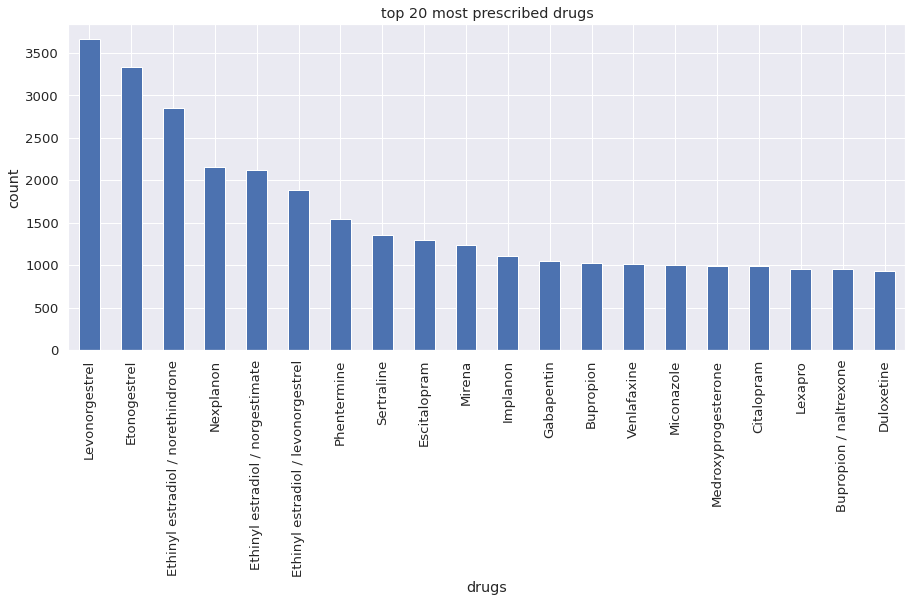

In [ ]:
plt.figure(figsize=(15,6))
sns.set(font_scale=1.2)

drug[:20].plot.bar()
plt.title("top 20 most prescribed drugs")
plt.xlabel("drugs")
plt.ylabel("count")

**Analyzing 'condition' column**

In [ ]:
condition=df['condition'].value_counts()
condition

Birth Control                                              28788
Depression                                                  9069
Pain                                                        6145
Anxiety                                                     5904
Acne                                                        5588
                                                           ...  
Dissociative Identity Disorde                                  1
Hydrocephalus                                                  1
Hyperlipoproteinemia Type III, Elevated beta-VLDL   IDL        1
Q Feve                                                         1
Neutropenia                                                    1
Name: condition, Length: 884, dtype: int64

> **ploting top 20 common conditions**

Text(0, 0.5, 'count')

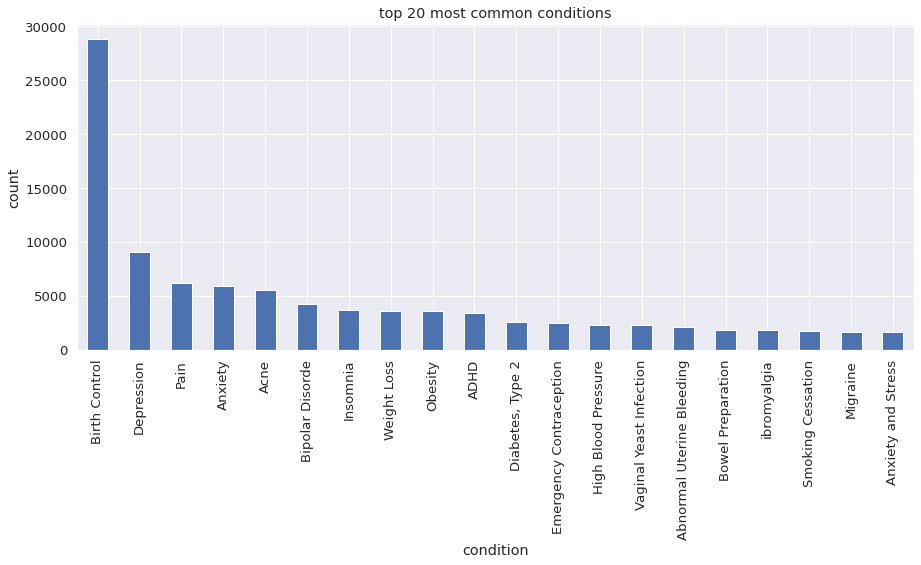

In [ ]:
plt.figure(figsize=(15,6))
sns.set(font_scale=1.2)

condition[:20].plot.bar()
plt.title("top 20 most common conditions")
plt.xlabel("condition")
plt.ylabel("count")

> **Plotting least 20 common conditions**

Text(0, 0.5, 'count')

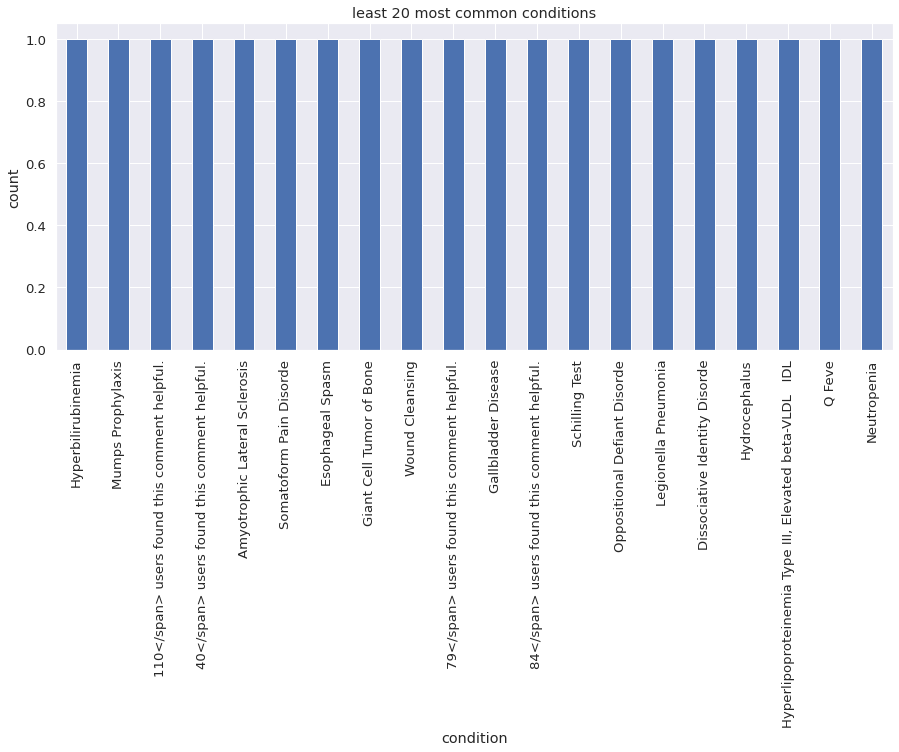

In [ ]:
plt.figure(figsize=(15,6))
sns.set(font_scale=1.2)

condition[-20:].plot.bar()
plt.title("least 20 most common conditions")
plt.xlabel("condition")
plt.ylabel("count")

> it should be noted that the phrase "<./span> users found this comment helpful" appears in the condition. we will delete these rows during preprocessing step



> **ploting Top 10 drugs which are used for the top condition, that is Birth Control**

Etonogestrel                          3314
Ethinyl estradiol / norethindrone     2337
Nexplanon                             2149
Levonorgestrel                        2129
Ethinyl estradiol / levonorgestrel    1600
Ethinyl estradiol / norgestimate      1580
Implanon                              1095
Mirena                                 965
Skyla                                  822
Lo Loestrin Fe                         667
Name: drugName, dtype: int64

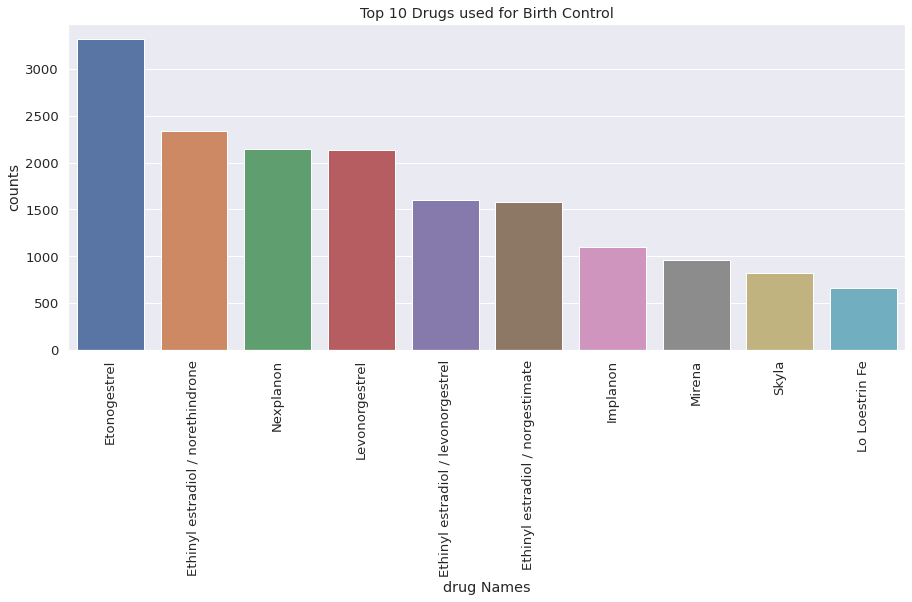

In [ ]:
drug1=df[df['condition']=='Birth Control']['drugName'].value_counts()[0:10]

sns.set(font_scale = 1.2)
plt.figure(figsize=(15,6))
sns.barplot(x=drug1.index,y=drug1.values).set(title="Top 10 Drugs used for Birth Control",xlabel='drug Names',ylabel='counts')
plt.xticks(rotation=90)
drug1

>**Analyzing rating column**

In [ ]:
ratings=df['rating'].value_counts()
ratings

10    50989
9     27531
1     21619
8     18890
7      9456
5      8013
2      6931
3      6513
6      6343
4      5012
Name: rating, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='count'>

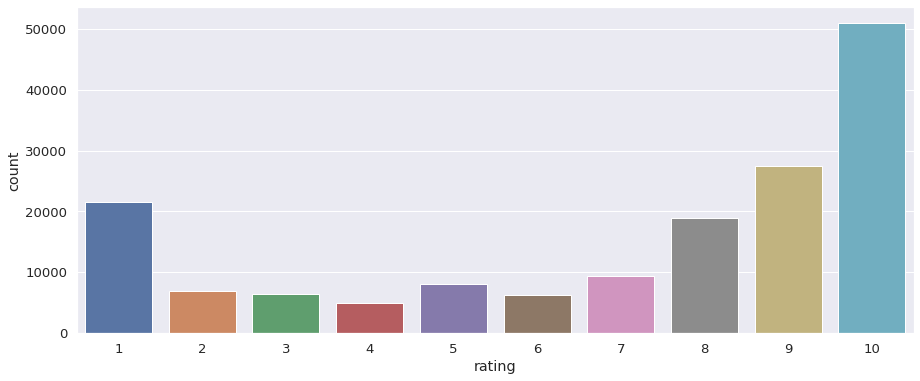

In [ ]:
plt.figure(figsize=(15,6))
sns.set(font_scale=1.2)
sns.countplot('rating',data=df)

> **ploting top 10 drugs with 10/10 rating**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Levonorgestrel'),
  Text(1, 0, 'Phentermine'),
  Text(2, 0, 'Etonogestrel'),
  Text(3, 0, 'Varenicline'),
  Text(4, 0, 'Ethinyl estradiol / norethindrone'),
  Text(5, 0, 'Escitalopram'),
  Text(6, 0, 'Clonazepam'),
  Text(7, 0, 'Alprazolam'),
  Text(8, 0, 'Plan B'),
  Text(9, 0, 'Sertraline')])

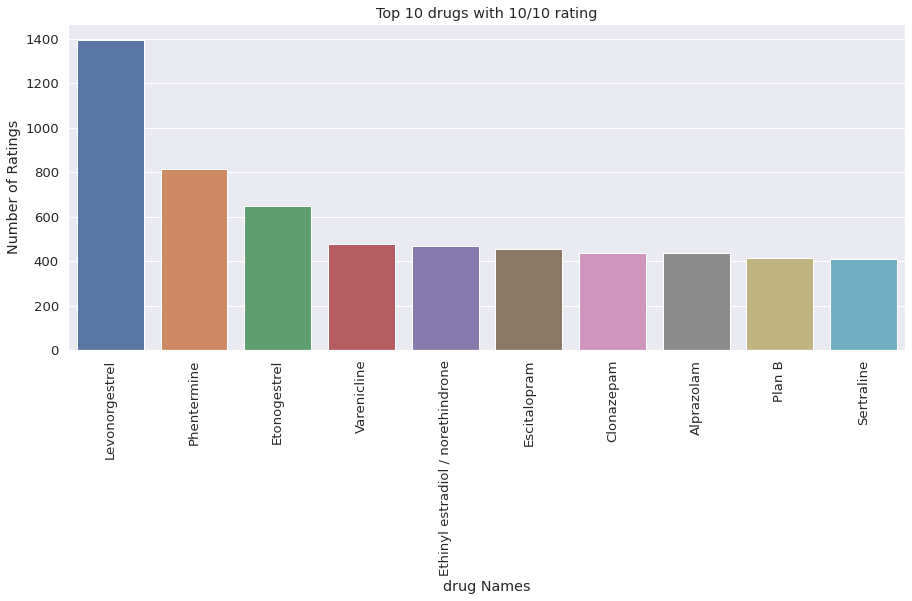

In [ ]:
rating1=df[df['rating']==10]['drugName'].value_counts()[:10]

sns.set(font_scale = 1.2)
plt.figure(figsize=(15,6))
sns.barplot(x=rating1.index,y=rating1.values).set(title="Top 10 drugs with 10/10 rating",xlabel='drug Names',ylabel='Number of Ratings')
plt.xticks(rotation=90)

> **Ploting 10 drugs with the 1/10 rating**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Ethinyl estradiol / norethindrone'),
  Text(1, 0, 'Miconazole'),
  Text(2, 0, 'Etonogestrel'),
  Text(3, 0, 'Levonorgestrel'),
  Text(4, 0, 'Nexplanon'),
  Text(5, 0, 'Ethinyl estradiol / norgestimate'),
  Text(6, 0, 'Medroxyprogesterone'),
  Text(7, 0, 'Depo-Provera'),
  Text(8, 0, 'Ethinyl estradiol / levonorgestrel'),
  Text(9, 0, 'Tioconazole')])

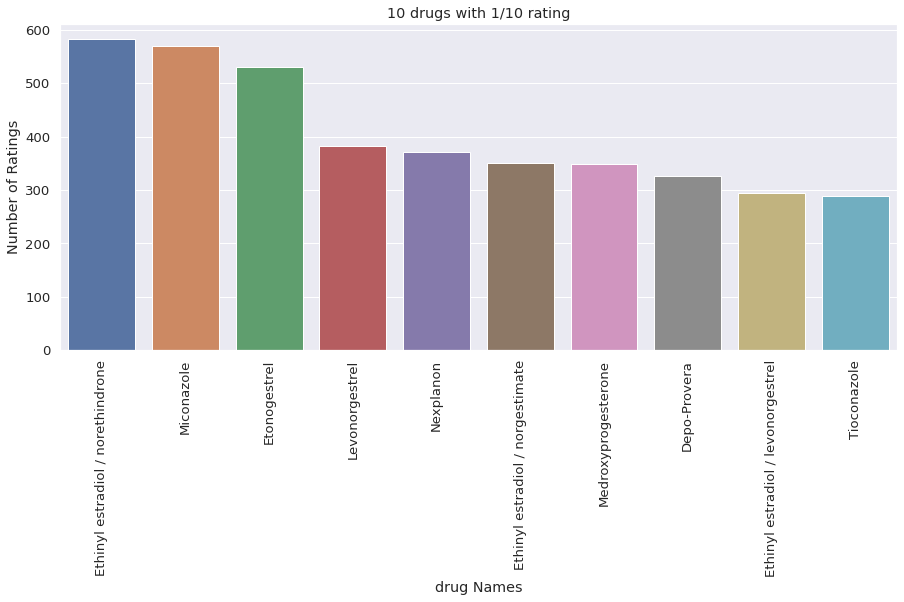

In [ ]:
rating1=df[df['rating']==1]['drugName'].value_counts()[:10]

sns.set(font_scale = 1.2)
plt.figure(figsize=(15,6))
sns.barplot(x=rating1.index,y=rating1.values).set(title="10 drugs with 1/10 rating",xlabel='drug Names',ylabel='Number of Ratings')
plt.xticks(rotation=90)

>**Analyzing 'usefulcount' column**

> **printing 10 rows of the dataframe with most number of useful counts**

In [ ]:
# Sort dataframe from most to least useful

useful=df.sort_values(by='usefulCount',ascending=False)
useful.iloc[:10]

,uniqueID,drugName,condition,review,rating,date,usefulCount
6716,96616,Sertraline,Depression,"""I remember reading people&#039;s opinions, on...",10,31-Jul-08,1291
33552,119152,Zoloft,Depression,"""I remember reading people&#039;s opinions, on...",10,31-Jul-08,1291
21708,131116,Levonorgestrel,Birth Control,"""I have had my IUD for over a year now and I t...",10,1-Apr-09,1247
4249,182560,Mirena,Birth Control,"""I have had my IUD for over a year now and I t...",10,1-Apr-09,1247
146145,119151,Zoloft,Depression,"""I&#039;ve been on Zoloft 50mg for over two ye...",9,5-Aug-08,949
58608,139141,Phentermine,Weight Loss,"""I have used this pill off and on for the past...",10,19-Oct-08,796
16889,52305,Adipex-P,Weight Loss,"""I have used this pill off and on for the past...",10,19-Oct-08,796
2039,62757,Citalopram,Depression,"""I responded after one week. The side effects ...",8,25-Mar-08,771
152838,89825,Celexa,Depression,"""I responded after one week. The side effects ...",8,25-Mar-08,771
5218,107655,Implanon,Birth Control,"""I was very nervous about trying Implanon afte...",10,19-Jul-10,730


>**Printing some rows of dataframe with the least number of useful counts**

In [ ]:
useful.iloc[-9:]

,uniqueID,drugName,condition,review,rating,date,usefulCount
133874,152154,Chantix,0</span> users found this comment helpful.,"""I started taking Chantix some time after Chri...",8,26-Feb-09,0
45450,103115,Estarylla,Birth Control,"""I DO NOT recommend this birth control to anyo...",2,3-Dec-17,0
92658,177151,Imiglucerase,Gaucher Disease,"""I had very good results using Cerezyme. I wa...",9,15-Nov-12,0
73634,142237,Levonorgestrel,Birth Control,"""Skyla is the third birth control method I&rsq...",6,22-Nov-17,0
27359,6895,Aluminum chloride hexahydrate,Hyperhidrosis,"""It only burns when putting on after shaving o...",10,21-Aug-17,0
35698,168048,Imipramine,Depression,"""I was on imipramine for a little over a year,...",7,13-Nov-17,0
35703,107357,Implanon,Birth Control,"""I received Implanon in May of 2008. I am due ...",5,9-Nov-11,0
92637,123484,Skyla,Birth Control,"""The only warning my gyno gave me was that I w...",8,17-Oct-17,0
80187,110752,Tri-Luma,Melasma,"""I started yesterday and today I see it darker...",5,20-Jul-17,0


# **Data preprocessing**

In [ ]:
# Calculating what percentage of data is null
size=len(df)

print("Total Size of the dataset : ",size)

total_na=df.isna().sum()['condition']
print("Null values: ",total_na)

print("PERCENTAGE : ",(total_na/size)*100)

Total Size of the dataset :  161297
Null values:  899
PERCENTAGE :  0.5573569254232875


In [ ]:
# Dropping the data points with null values as it's very much less than 1% of the whole dataset
df=df.dropna(axis=0)

df = df.reset_index(drop=True)

df.shape

(160398, 7)

In [ ]:
#removing rows in 'contition' column containing "</span> users found this comment helpful"

all_list = set(df.index)
span_list = []
for i,j in enumerate(df['condition']):
    if '</span>' in j:
        span_list.append(i)

new_idx = all_list.difference(set(span_list))
df = df.iloc[list(new_idx)].reset_index()
del df['index']

df.shape

(159498, 7)

In [ ]:
# converting the date into datetime format
df['date']=pd.to_datetime(df['date'],errors='coerce')

# now extracting year from date
df['Year']=df['date'].dt.year

# extracting the month from the date
df['month']=df['date'].dt.month

# extracting the days from the date
df['day']=df['date'].dt.day

df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Year,month,day
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,2012,5,20
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,2010,4,27
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,2009,12,14
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,2015,11,3
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,2016,11,27


> **Printing most reviewed drugs in each year**

In [ ]:
df.groupby('Year') ['drugName'].max()

Year
2008     Zyvox
2009     Zyvox
2010    femhrt
2011    femhrt
2012      ella
2013      ella
2014      ella
2015      ella
2016      ella
2017      ella
Name: drugName, dtype: object

>**Printing most reviewed drug each month**

In [ ]:
df.groupby('month') ['drugName'].max()

month
1     femhrt
2       ella
3       ella
4       ella
5       ella
6       ella
7       ella
8       ella
9       ella
10      ella
11      ella
12      ella
Name: drugName, dtype: object

Text(0, 0.5, 'Count of Reviews')

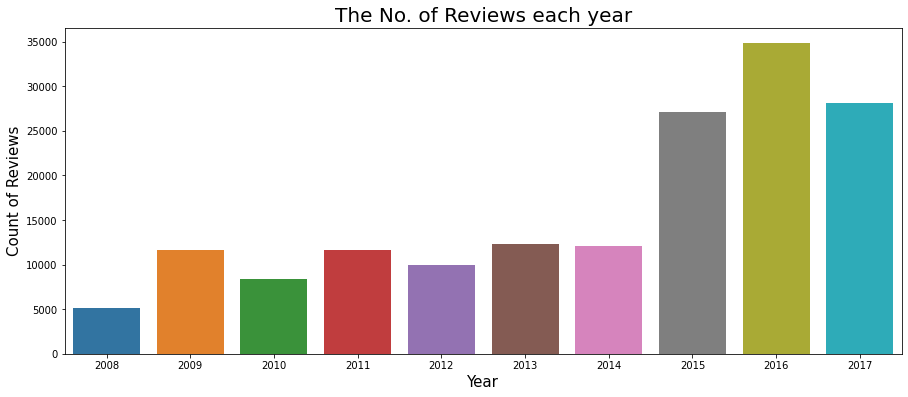

In [ ]:
#looking at the no. of reviews in each of the year

plt.figure(figsize=(15,6))
sns.countplot(df['Year'])
plt.title('The No. of Reviews each year',fontsize=20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)

> The barplot shows that the year 2016 has the most number of reviews and 2008 has the least number of reviews.

Text(0, 0.5, 'Ratings')

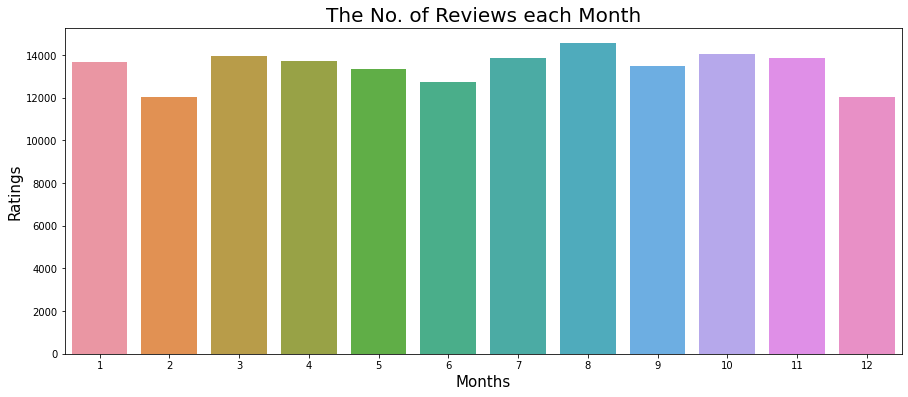

In [ ]:
# looking at the no. of reviews in each of the months

plt.figure(figsize=(15,6))
sns.countplot(df['month'])
plt.title('The No. of Reviews each Month', fontsize = 20)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Ratings', fontsize = 15)


> the barplot shows the number of reviews is most in the month of august

Text(0, 0.5, 'Ratings')

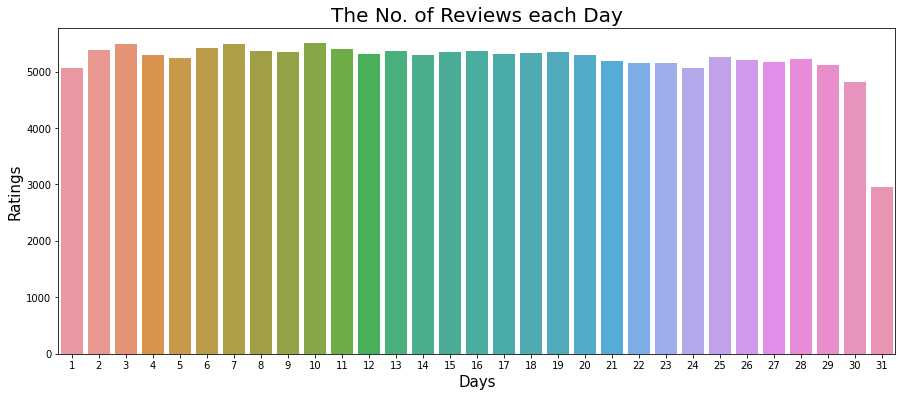

In [ ]:
# looking at the no. of reviews in each of the day

plt.figure(figsize=(15,6))
sns.countplot(df['day'])
plt.title('The No. of Reviews each Day', fontsize = 20)
plt.xlabel('Days', fontsize = 15)
plt.ylabel('Ratings', fontsize = 15)

> **Preprocessing 'review' column using NLP**

In [ ]:
#downloading required libraries

nltk.download('wordnet')        #for lemmatization
nltk.download('stopwords')
nltk.download('punkt')          #for tokenization
nltk.download('vader_lexicon')  #for Sentiment analysis

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

> VADER (Valence Aware Dictionary and sEntiment Reasoner) is a pre-trained sentiment lexicon. 

In [ ]:
reviews=df['review']
reviews

0         "It has no side effect, I take it in combinati...
1         "My son is halfway through his fourth week of ...
2         "I used to take another oral contraceptive, wh...
3         "This is my first time using any form of birth...
4         "Suboxone has completely turned my life around...
                                ...                        
159493    "I wrote my first report in Mid-October of 201...
159494    "I was given this in IV before surgey. I immed...
159495    "Limited improvement after 4 months, developed...
159496    "I&#039;ve been on thyroid medication 49 years...
159497    "I&#039;ve had chronic constipation all my adu...
Name: review, Length: 159498, dtype: object

> **Tokenization using TweetTokenizer**

In [ ]:
from nltk import TweetTokenizer
tk=TweetTokenizer()
reviews=reviews.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
reviews

0         " It has no side effect , I take it in combina...
1         " My son is halfway through his fourth week of...
2         " I used to take another oral contraceptive , ...
3         " This is my first time using any form of birt...
4         " Suboxone has completely turned my life aroun...
                                ...                        
159493    " I wrote my first report in Mid-October of 20...
159494    " I was given this in IV before surgey . I imm...
159495    " Limited improvement after 4 months , develop...
159496    " I've been on thyroid medication 49 years , I...
159497    " I've had chronic constipation all my adult l...
Name: review, Length: 159498, dtype: object

> **Removing characters**

In [ ]:
reviews=reviews.str.replace('[^a-zA-Z0-9]+',' ')
reviews

0          It has no side effect I take it in combinatio...
1          My son is halfway through his fourth week of ...
2          I used to take another oral contraceptive whi...
3          This is my first time using any form of birth...
4          Suboxone has completely turned my life around...
                                ...                        
159493     I wrote my first report in Mid October of 201...
159494     I was given this in IV before surgey I immedi...
159495     Limited improvement after 4 months developed ...
159496     I ve been on thyroid medication 49 years I sp...
159497     I ve had chronic constipation all my adult li...
Name: review, Length: 159498, dtype: object

> **Lemmatization using SnowballStemmer and coverting into lowercase**


In [ ]:
from nltk import SnowballStemmer
sb=SnowballStemmer('english')
reviews=reviews.apply(lambda x:[sb.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
reviews

0         it has no side effect i take it in combin of b...
1         my son is halfway through his fourth week of i...
2         i use to take anoth oral contracept which had ...
3         this is my first time use ani form of birth co...
4         suboxon has complet turn my life around i feel...
                                ...                        
159493    i wrote my first report in mid octob of 2014 i...
159494    i was given this in iv befor surgey i immedi b...
159495    limit improv after 4 month develop bad rash an...
159496    i ve been on thyroid medic 49 year i spent my ...
159497    i ve had chronic constip all my adult life tri...
Name: review, Length: 159498, dtype: object

> **Removing stop words**

In [ ]:
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
reviews=reviews.apply(lambda x:[i for i in tk.tokenize(x) if i not in stop_words]).apply(lambda x:" ".join(x))
reviews

0              side effect take combin bystol 5 mg fish oil
1         son halfway fourth week intuniv becam concern ...
2         use take anoth oral contracept 21 pill cycl ve...
3         first time use ani form birth control glad wen...
4         suboxon complet turn life around feel healthie...
                                ...                        
159493    wrote first report mid octob 2014 ani alcohol ...
159494    given iv befor surgey immedi becam anxious cou...
159495    limit improv 4 month develop bad rash md refus...
159496    thyroid medic 49 year spent first 38 synthroid...
159497    chronic constip adult life tri linzess work mo...
Name: review, Length: 159498, dtype: object

> **Quantifying sentiments of the reviews using SentimentIntensityAnalyzer**

In [ ]:
si=SentimentIntensityAnalyzer()
# Create list (cast to array) of compound polarity sentiment scores for reviews
sentiments=[]

for i in reviews:
    sentiments.append(si.polarity_scores(i).get('compound'))

df['sentiment']=pd.Series(sentiments)
df.head() 

,uniqueID,drugName,condition,review,rating,date,usefulCount,Year,month,day,sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,2012,5,20,0.0000
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,2010,4,27,0.6929
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,2009,12,14,0.5106
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,2015,11,3,0.1027
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,2016,11,27,0.8934


In [ ]:
# Label Encoding Drugname and Conditions
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for feature in ['drugName','condition']:
    df[feature]=le.fit_transform(df[feature])

In [ ]:
# classifying ratings as positive and negative

df['rating']=df['rating'].apply(lambda x: 1 if x>5 else 0)

>**Checking the distribution of rating**

1    112003
0     47495
Name: rating, dtype: int64


<AxesSubplot:ylabel='rating'>

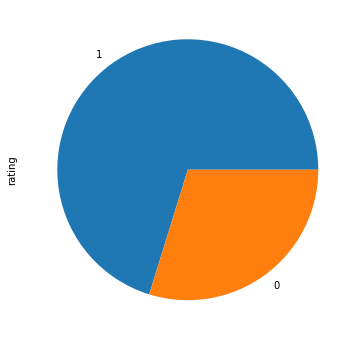

In [ ]:
rating=df['rating'].value_counts()
print(rating)
plt.figure(figsize=(15,6))

rating.plot.pie()

> Positively rated reviews are more.

In [ ]:
df.drop(['uniqueID','review','date'],axis=1,inplace=True)
df.head()

,drugName,condition,rating,usefulCount,Year,month,day,sentiment
0,3179,393,1,27,2012,5,20,0.0000
1,1422,0,1,192,2010,4,27,0.6929
2,1842,92,0,17,2009,12,14,0.5106
3,2266,92,1,10,2015,11,3,0.1027
4,513,501,1,37,2016,11,27,0.8934


> **Plotting correlation matrix of all the features**

             drugName  condition    rating  usefulCount      Year     month  \
drugName     1.000000   0.082349  0.008006     0.024519  0.010411  0.002863   
condition    0.082349   1.000000  0.050023     0.091171 -0.058603 -0.002516   
rating       0.008006   0.050023  1.000000     0.211502 -0.189150 -0.020687   
usefulCount  0.024519   0.091171  0.211502     1.000000 -0.271660 -0.032444   
Year         0.010411  -0.058603 -0.189150    -0.271660  1.000000 -0.083896   
month        0.002863  -0.002516 -0.020687    -0.032444 -0.083896  1.000000   
day         -0.002119  -0.003023  0.002940     0.002253 -0.012135 -0.016959   
sentiment   -0.013459  -0.037741  0.196511     0.016744 -0.069239 -0.011387   

                  day  sentiment  
drugName    -0.002119  -0.013459  
condition   -0.003023  -0.037741  
rating       0.002940   0.196511  
usefulCount  0.002253   0.016744  
Year        -0.012135  -0.069239  
month       -0.016959  -0.011387  
day          1.000000   0.001536  
sentimen

<AxesSubplot:>

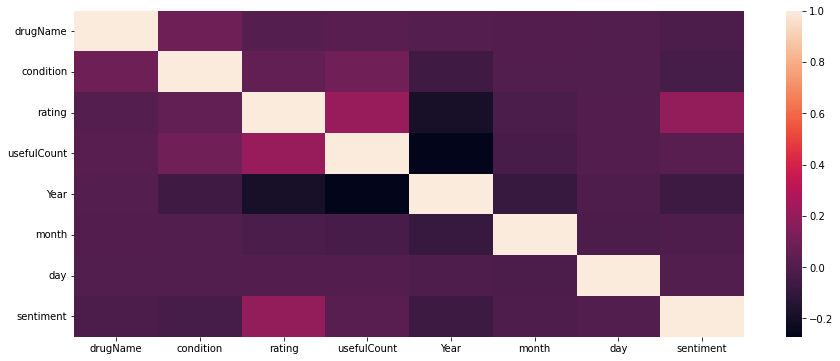

In [ ]:
print(df.corr())
plt.figure(figsize=(15,6))
sns.heatmap(df.corr())

> **Observations**
>* Year and useful count are least correlated
>* Year and rating are least correlated
>* useful count and rating are moderalety correlated
>* rating and sentiment are moderately correlated
>* The output feature 'rating' is negtively correlated with the features 'year' and 'month'.

#**Model Creation and performance evaluation**

> **Splitting the dataframe into x any y**


In [ ]:
x=df.drop(['rating'],axis=1).values
print(x)

[[ 3.179e+03  3.930e+02  2.700e+01 ...  5.000e+00  2.000e+01  0.000e+00]
 [ 1.422e+03  0.000e+00  1.920e+02 ...  4.000e+00  2.700e+01  6.929e-01]
 [ 1.842e+03  9.200e+01  1.700e+01 ...  1.200e+01  1.400e+01  5.106e-01]
 ...
 [ 2.260e+03  6.280e+02  3.500e+01 ...  3.000e+00  1.500e+01 -7.351e-01]
 [ 3.005e+03  7.390e+02  7.900e+01 ...  9.000e+00  1.900e+01  8.763e-01]
 [ 1.828e+03  1.600e+02  1.160e+02 ...  1.200e+01  1.300e+01 -4.588e-01]]


In [ ]:
y=df['rating'].values
y 

array([1, 1, 0, ..., 0, 1, 1])

> **Splitting into training data and testing data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

> **Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

> **Model creation**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

knn=KNeighborsClassifier(n_neighbors=5)
nb=MultinomialNB()
tree=DecisionTreeClassifier(criterion='entropy')
forest=RandomForestClassifier(n_estimators=100,criterion='entropy')

model_lst=[knn,nb,tree,forest]

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
for i in model_lst:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("**************************************************************************")
  print(classification_report(y_test,y_pred))
  print("**************************************************************************")


KNeighborsClassifier()
**************************************************************************
              precision    recall  f1-score   support

           0       0.47      0.36      0.41     14300
           1       0.75      0.82      0.79     33550

    accuracy                           0.69     47850
   macro avg       0.61      0.59      0.60     47850
weighted avg       0.67      0.69      0.67     47850

**************************************************************************
MultinomialNB()
**************************************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     14300
           1       0.70      1.00      0.82     33550

    accuracy                           0.70     47850
   macro avg       0.35      0.50      0.41     47850
weighted avg       0.49      0.70      0.58     47850

**************************************************************************
Decisio

<AxesSubplot:>

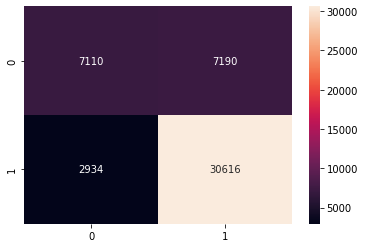

In [ ]:
sns.heatmap(confusion_matrix(y_test,forest.predict(x_test)),annot=True,fmt="d")

> **Obervations**
>* Random forest gives the maximum accuracy of 79%
>* From the confusion matrix of randon forest, the values of false positve(7190) is high. So we are performing feature selection to improve performance of the model.

> **Feature selection using chi2**

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Convert x_train to a pandas DataFrame
x_train_df = pd.DataFrame(x_train, columns=['drugName', 'condition', 'usefulCount', 'Year', 'month', 'day','sentiment'])

# Apply feature selection using SelectKBest and chi2
select_feature = SelectKBest(chi2, k=5).fit(x_train_df, y_train)

# Print the selected feature scores and names

score=pd.DataFrame(list(zip(select_feature.scores_, x_train_df.columns)), columns=['Score', 'Feature'])
print(score.sort_values(by='Score'))

print('Feature list:', x_train_df.columns[select_feature.get_support()])

        Score      Feature
5    0.007636          day
0    0.967780     drugName
4    8.045422        month
1   67.589046    condition
2  186.280850  usefulCount
3  559.358345         Year
6  787.159306    sentiment
Feature list: Index(['condition', 'usefulCount', 'Year', 'month', 'sentiment'], dtype='object')


> **Creating new model removing irrelevant features**

In [ ]:
x1=df[['condition', 'usefulCount', 'Year', 'month', 'sentiment']].values
y1=df['rating'].values

In [ ]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.30,random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x1_train)
x1_train=scaler.fit_transform(x1_train)
x1_test=scaler.fit_transform(x1_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
for i in model_lst:
  print(i)
  i.fit(x1_train,y1_train)
  y1_pred=i.predict(x1_test)
  print("**************************************************************************")
  print(classification_report(y1_test,y1_pred))
  print("**************************************************************************")


KNeighborsClassifier()
**************************************************************************
              precision    recall  f1-score   support

           0       0.53      0.45      0.48     14300
           1       0.78      0.83      0.80     33550

    accuracy                           0.72     47850
   macro avg       0.65      0.64      0.64     47850
weighted avg       0.70      0.72      0.71     47850

**************************************************************************
MultinomialNB()
**************************************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     14300
           1       0.70      1.00      0.82     33550

    accuracy                           0.70     47850
   macro avg       0.35      0.50      0.41     47850
weighted avg       0.49      0.70      0.58     47850

**************************************************************************
Decisio

<AxesSubplot:>

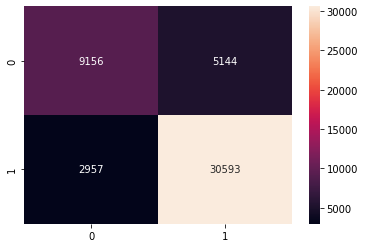

In [ ]:
sns.heatmap(confusion_matrix(y1_test,forest.predict(x1_test)),annot=True,fmt="d")

>**Observations**

>* Accuracy of the model is increased after featurev selection.
>* From the confusion matrix it may be observed that, the value of True positive(30593) and False negative(2957) remain the same . but the values of False positice has decresed and True negative has increased


#**Conclusion**

>* The dataset consists of 7 columns: 'uniqueID', 'drugName', 'condition', 'review', 'rating', 'date', and 'usefulCount'.
>* I have performed NLP to find sentiment intensity of reviews
>* Feature selection was performed to select the most important input features for the model. The selected features were found to be 'usefulCount', 'sentiment', 'Year', 'condition', and 'month'.
>* The output feature was 'rating', which is a categorical variable representing the overall rating of the drug.
>* Amoung all other classifiers, the Random Forest classifier achieved the maximum accuracy in predicting the rating of the drug.